## IN3050/IN4050 Mandatory Assignment 2: Supervised Learning

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo" https://www.uio.no/english/about/regulations/studies/studies-examinations/routines-cheating.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, March 19, 2021, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.


### Goals of the exercise
This exercise has three parts. The goal of the first part is to get more experience with supervised classification. We will use simple synthetic datasets and focus on the learning algorithms. 

The goal of the second part is to consider the implementaion of the  Multi-layer feed forward neural network, often called Multi-layer perceptron (MLP).

The third part, which is the smallest one, is dedicated to evaluation.

### Tools
The aim of the exercises is to give you a look inside the learning algorithms. You may freely use code from the weekly exercises and the published solutions. You should not use ML libraries like scikit-learn or tensorflow.

You may use tools like NumPy and Pandas, which are not specific ML-tools.

### Beware
There might occur typos or ambiguities. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your own and explain them!

### Initialization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import random
import time
import importlib
from tabulate import tabulate
from collections import Counter

# Part 1: Comparing classifiers
## Datasets
We start by making a synthetic dataset of 1600 datapoints and three classes, with 800 individuals in one class and 400 in each of the two other classes. (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs regarding how the data are generated.)

When we are doing experiments in supervised learning, and the data are not already split into training and test sets, we should start by splitting the data. Sometimes there are natural ways to split the data, say training on data from one year and testing on data from a later year, but if that is not the case, we should shuffle the data randomly before splitting. (OK, that is not necessary with this particular synthetic data set, since it is already shuffled by default by scikit, but that will not be the case with real-world data.) We should split the data so that we keep the alignment between X and t, which may be achieved by shuffling the indices. We split into 50% for training, 25% for validation, and 25% for final testing. The set for final testing *must not be used* till the end of the assignment in part 3.

We fix the seed both for data set generation and for shuffling, so that we work on the same datasets when we rerun the experiments.

In [3]:
from sklearn.datasets import make_blobs
X, t = make_blobs(n_samples=[400,800,400], centers=[[0,0],[1,2],[2,3]], 
                  n_features=2, random_state=2019)

In [4]:
indices = np.arange(X.shape[0])
random.seed(2020)
random.shuffle(indices)
indices[:10]

array([1301,  293,  968,  624,  658,  574,  433,  368,  512,  353])

In [5]:
X_train = X[indices[:800],:]
X_val = X[indices[800:1200],:]
X_test = X[indices[1200:],:]
t_train = t[indices[:800]]
t_val = t[indices[800:1200]]
t_test = t[indices[1200:]]

Next, we will  make a second dataset by merging the two smaller classes in (X,t) and call the new set (X, t2). This will be a binary set.

In [6]:
t2_train = t_train == 1
t2_train = t2_train.astype('int')
t2_val = (t_val == 1).astype('int')
t2_test = (t_test == 1).astype('int')

Plot the two training sets.

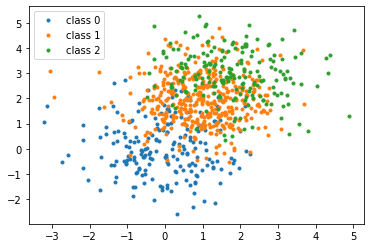

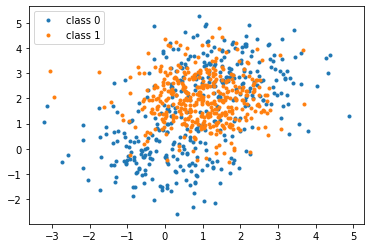

In [7]:

#plt.scatter(X_train[:,0], X_train[:,1])
#plt.scatter(X_train[:,0], X_train[:,1])

def show(X, y, marker='.'): # Borrowing the plotting function from solutions to week 5
    labels = set(y)
    cl = {lab : [] for lab in labels}
    # cl[lab] shall contain the datapoints labeled lab
    for (a, b) in zip(X, y):
        cl[b].append(a)
    for lab in labels:
        plt.plot([a[0] for a in cl[lab]], [a[1] for a in cl[lab]], 
                 marker, label="class {}".format(lab))
    plt.legend()
    
X1 = X_train[:,0]
X1 = X_train[:,1]


show(X_train, t_train)
plt.show()
show(X_train, t2_train)


## Binary classifiers

### Linear regression
We see that that set (X, t2) is far from linearly separable, and we will explore how various classifiers are able to handle this. We start with linear regression. You may use the implementation from exercise set week07 or make your own. You should make one improvement. The implementation week07 runs for a set number of epochs. You provide the number of epochs with a parameter to the fit-method. However, you do not know what a reasonable number of epochs is. Add one more argument to the fit-method *diff* (with defualt value e.g. 0.001). The training should stop when the update is less than *diff*. The *diff* will save training time, but it may also be wise to not set it too small -- and not run training for too long -- to avoid overfitting.

Train the classifier on (X_train, t2_train) and test for accuracy on (X_val, t2_val) for various values of *diff*. Choose what you think is optimal *diff*. Report accuracy and save it for later.

In [56]:
# Borrowing from Week 7 solution set

class NumpyClassifier():
    """Common methods to all numpy classifiers --- if any"""
    
    def accuracy(self,X_test, y_test, **kwargs):
        pred = self.predict(X_test, **kwargs)
        if len(pred.shape) > 1:
            pred = pred[:,0]
        return sum(pred==y_test)/len(pred)
    
    


In [57]:
def add_bias(X):
    # Put bias in position 0
    sh = X.shape
    if len(sh) == 1:
        #X is a vector
        return np.concatenate([np.array([1]), X])
    else:
        # X is a matrix
        m = sh[0]
        bias = np.ones((m,1)) # Makes a m*1 matrix of 1-s
        return np.concatenate([bias, X], axis  = 1) 

In [68]:
class NumpyLinRegClass(NumpyClassifier):
    

    def fit(self, X_train, t_train, eta = 0.001, epochs=100000, diff = 0.0000001):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
        (k, m) = X_train.shape
        X_train = add_bias(X_train)
        
        self.weights = weights = np.zeros(m+1)
        
        for e in range(epochs):
            update = eta / k *  X_train.T @ (X_train @ weights - t_train)      
            
            if (np.linalg.norm(update) < diff):
                break
            weights -= update
    
    def predict(self, x, threshold=0.5):
        z = add_bias(x)
        score = z @ self.weights
        return score>threshold

In [69]:
# Measuring LinReg accuracy (and best settings)
for e in [1, 2, 5, 10, 50, 100, 1000, 10000, 100000, 1000000]:
    lr_cl =  NumpyLinRegClass()
    lr_cl.fit(X_train, t2_train, epochs=e, eta=0.0001)
    print("Learning rate: {:7}  Epochs: {:8}  Accuracy: {}".format(
        0.001, e, lr_cl.accuracy(X_test, t2_test)))

Learning rate:   0.001  Epochs:        1  Accuracy: 0.5125
Learning rate:   0.001  Epochs:        2  Accuracy: 0.5125
Learning rate:   0.001  Epochs:        5  Accuracy: 0.5125
Learning rate:   0.001  Epochs:       10  Accuracy: 0.5125
Learning rate:   0.001  Epochs:       50  Accuracy: 0.5125
Learning rate:   0.001  Epochs:      100  Accuracy: 0.5125
Learning rate:   0.001  Epochs:     1000  Accuracy: 0.505
Learning rate:   0.001  Epochs:    10000  Accuracy: 0.4625
Learning rate:   0.001  Epochs:   100000  Accuracy: 0.5525
Learning rate:   0.001  Epochs:  1000000  Accuracy: 0.5575


In [70]:
# trainig and results:

Lin_classifier = NumpyLinRegClass()
Lin_classifier.fit(X_train, t2_train)
Lin_acc = Lin_classifier.accuracy(X_val, t2_val)
print("Result:", Lin_acc)

Result: 0.6075


While the training and evaluation data are part of the same pool, I didn't expect the results to be so favorable. This might then be caused by overfitting. 

### Logistic regression
Do the same for logistic regression, i.e., add the *diff*, tune it, report accuracy, and store it for later.

In [72]:
def logistic(x):
    return 1/(1+np.exp(-x))

class NumpyLogReg(NumpyClassifier):

    def fit(self, X_train, t_train, eta = 0.1, epochs=10, diff = 0.00001):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
        (k, m) = X_train.shape
        X_train = add_bias(X_train)
        
        self.weights = weights = np.zeros(m+1)
        
        for e in range(epochs):
            update = eta / k *  X_train.T @ (self.forward(X_train) - t_train)   
            
            if (np.linalg.norm(update) < diff):
                break
            weights -= update
    
    def forward(self, X):
        return 1/(1+np.exp(-(X @ self.weights)))
    
    def score(self, x):
        z = add_bias(x)
        score = self.forward(z)
        return score
    
    def predict(self, x, threshold=0.5):
        z = add_bias(x)
        score = self.forward(z)
        return (score>threshold).astype('int')

In [73]:
#Retrieved the testing functions from the Week 7 solutions to help fit the model parameters
# Purposfully using the training data here! This is to inform my parameters when using the evaluation data
for e in [1, 2, 5, 10, 50, 100, 1000, 10000, 100000]:
    lr_cl = NumpyLogReg()
    lr_cl.fit(X_train, t2_train, epochs=e)
    print("Learning rate: {}  Epochs: {:7}  Accuracy: {}".format(
        0.1, e, lr_cl.accuracy(X_train, t2_train)))
print("Small intermezzo")
for eta in [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]:
    lr_cl = NumpyLogReg()
    lr_cl.fit(X_train, t2_train, epochs=1000, eta = eta)
    print("Learning rate: {:7}  Epochs: {:4}  Accuracy: {}".format(
        eta, 1000, lr_cl.accuracy(X_train, t2_train)))


Learning rate: 0.1  Epochs:       1  Accuracy: 0.635
Learning rate: 0.1  Epochs:       2  Accuracy: 0.6375
Learning rate: 0.1  Epochs:       5  Accuracy: 0.64125
Learning rate: 0.1  Epochs:      10  Accuracy: 0.6425
Learning rate: 0.1  Epochs:      50  Accuracy: 0.6525
Learning rate: 0.1  Epochs:     100  Accuracy: 0.63625
Learning rate: 0.1  Epochs:    1000  Accuracy: 0.5875
Learning rate: 0.1  Epochs:   10000  Accuracy: 0.5875
Learning rate: 0.1  Epochs:  100000  Accuracy: 0.5875
Small intermezzo
Learning rate:       1  Epochs: 1000  Accuracy: 0.58875
Learning rate:     0.1  Epochs: 1000  Accuracy: 0.5875
Learning rate:    0.01  Epochs: 1000  Accuracy: 0.63625
Learning rate:   0.001  Epochs: 1000  Accuracy: 0.6425
Learning rate:  0.0001  Epochs: 1000  Accuracy: 0.63625
Learning rate:   1e-05  Epochs: 1000  Accuracy: 0.48


Here it looks like the accuracy for epoch runs stops at around 1000. It's actually worse for higher epochs but I attribute this to the learning rate overshooting the target instead.

Based on this and some testing I select my eta = 0.001, and my epoch = 100000

In [74]:
Log_classifier = NumpyLinRegClass()
Log_classifier.fit(X_train, t2_train, eta= 0.001, epochs= 100000)
Log_acc = Log_classifier.accuracy(X_val, t2_val)
print("Result:", Log_acc)

Result: 0.6075


This is strangely the same as linear. However, Lønning commented on the same thing in his walkthrough of the scickit ML tools, and he received the same results. Ofcours, it's also highly dependent on the parameters selected, but it seems like 0.6075 is the 'roof'. 

### *k*-nearest neighbors (*k*NN)
We will now compare to the *k*-nearest neighbors classifier. You may use the implementation from the week05 exercise set. Beware, though, that we represented the data differently from what we do here, using Python lists instead of numpy arrays. You might have to either modify the representation of the data or the code a little.

Train on (X_train, t2_train) and test on (X2_val, t2_val) for various values of *k*. Choose the best *k*, report accuracy and store for later.

In [16]:
# Borrowing from the week 5 solution page.

def distance_L2(a, b):
    "L2-distance using comprehension"
    s = sum((x - y) ** 2 for (x,y) in zip(a,b))
    return s ** 0.5

def majority(a):
    counts = Counter(a)
    return counts.most_common()[0][0]

class PykNNClassifier():
    
    """kNN classifier using pure python representations"""
    
    def accuracy(self,X_test, y_test, **kwargs):
        """Calculate the accuracy of the classifier 
        using the predict method"""
        predicted = [self.predict(a, **kwargs) for a in X_test]
        equal = len([(p, g) for (p,g) in zip(predicted, y_test) if p==g])
        return equal / len(y_test)
    
    def __init__(self, k=3, dist=distance_L2):
        self.k = k
        self.dist = dist
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, a):
        X = self.X_train
        y = self.y_train
        distances = [(self.dist(a, b), b, c) for (b, c) in zip(X, y)]
        distances.sort()
        predictors = [c for (_,_,c) in distances[0: self.k]]
        return majority(predictors)
    

[0.67, 0.68, 0.7125, 0.735, 0.7325, 0.7375, 0.7475, 0.7525, 0.75, 0.7525]


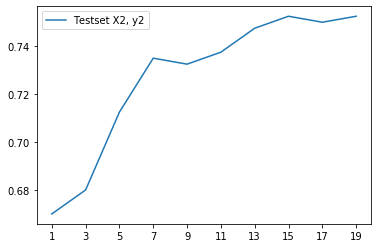

In [17]:
# borrowing the predictor too
from collections import Counter
x = range(1, 20, 2)
accuracies = []
for k in x:
    cls = PykNNClassifier(k=k)
    cls.fit(X_train, t2_train)
    accuracies.append(cls.accuracy(X_val, t2_val))
plt.plot(x, accuracies, label="Testset X2, y2")
plt.xticks(x)
plt.legend()
print(accuracies)
KNN_acc = accuracies[-1]

By using the accuracy chart from the weekly solution I get a good overview of how many neighbours its worth including. We peek at max neighbours which might suggest that I could increase the neighbour count, but 75% is around what Scikit showed, and so I'm happy with that result. I could have reduced the number of neighbours to 14 which seems to have the same accuracy. If the set becomes large it might be worthwhile as the larger K's get expensive computationally. Still, I select the K=19 for a final accuracy of 0.7525, which is a better result than both of the regression classifiers.

### Simple perceptron
Finally, run the simple perceptron (week06) on the same set, and report and store accuracy.

In [18]:
# Borrowing from the week 6 solutions


class Perceptron_simple():
    """Simple perceptron python classifier
    
    Stop on convergence.
    Three levels of tracing, trace = 1, 2 or 3."""
    def accuracy(self,X_test, y_test, **kwargs):
        """Calculate the accuracy of the classifier 
        using the predict method"""
        predicted = [self.predict(a, **kwargs) for a in X_test]
        equal = len([(p, g) for (p,g) in zip(predicted, y_test) if p==g])
        return equal / len(y_test)
    
    def fit(self, X_train, y_train, eta=1, epochs=1,
                trace = False):
        X_train = [[1]+list(x) for x in X_train] # Put bias in position 0      
        self.dim = dim = len(X_train[0])
        self.weights = weights = [0 for _ in range(dim)]
        # Initialize all weights to 0. There are better ways!

        e = 0
        converged = False
        updated = 0
        while e < epochs and not converged:
            converged = True
            e += 1
            
            if trace >= 2:
                print("Epoch no: ", e)
                
            for x, t in zip(X_train, y_train):
                y = int(self.forward(x)>0)
                for i in range(dim):
                    weights[i] += eta * (t - y) * x[i]
                    
                if y != t: 
                    updated += 1
                    converged = False
                    
                if (trace == 2 and y != t) or trace == 3 :
                    print("x: {}, t: {}, y: {}  ".format(x,t,y), end=" ")
                    print("Weights:", end = " ")
                    for w in weights:
                        print("{:7.3f}, ".format(w), end = '')
                    print('')

        if trace:
            if converged:
                print("Training completed with convergence")
            else:
                print("Training completed without convergence")
            print("Number of epochs: {}, number of updates: {}". format(
                e, updated))
        
    def forward(self, x):
        score = sum([self.weights[i]*x[i] for i in range(self.dim)])
        return score       
    
    def predict(self, x):
        x = [1] + list(x)
        score = self.forward(x)
        return int(score > 0)
    


In [19]:
# Here too I borrow the accuracy tool built in the solution set.
start = time.time()
for i in range(1,21):
    cl = Perceptron_simple()
    cl.fit(X_train, t2_train, eta= 0.1, epochs = i)
    test = cl.accuracy(X_val, t2_val)
    print("Accuracy after {:2} epochs, test: {:6.3f}".format(
    i, test))
fin = time.time()
print("Comp time:", fin - start, "seconds")

Accuracy after  1 epochs, test:  0.647
Accuracy after  2 epochs, test:  0.650
Accuracy after  3 epochs, test:  0.593
Accuracy after  4 epochs, test:  0.588
Accuracy after  5 epochs, test:  0.647
Accuracy after  6 epochs, test:  0.625
Accuracy after  7 epochs, test:  0.583
Accuracy after  8 epochs, test:  0.650
Accuracy after  9 epochs, test:  0.650
Accuracy after 10 epochs, test:  0.595
Accuracy after 11 epochs, test:  0.583
Accuracy after 12 epochs, test:  0.565
Accuracy after 13 epochs, test:  0.613
Accuracy after 14 epochs, test:  0.647
Accuracy after 15 epochs, test:  0.593
Accuracy after 16 epochs, test:  0.583
Accuracy after 17 epochs, test:  0.662
Accuracy after 18 epochs, test:  0.598
Accuracy after 19 epochs, test:  0.595
Accuracy after 20 epochs, test:  0.647
Comp time: 2.20095157623291 seconds


In [20]:
cl = Perceptron_simple()
cl.fit(X_train, t2_train, eta= 0.1, epochs = i)
Per_acc = cl.accuracy(X_val, t2_val)

Here the perceptron seems to kind of haphazardly fool round for eta=0.1 and epoch=10. I do end up with an accuracy of 64.7%, which is better than both the regression classifiers so it's not last. However, I belive I can bump this up by using the same parameters as the logistic regression class. This isn't because these classifiers are magickly linked, but instead because hey, the learning parameter is probably overshooting here and it worked for the logistic classifier.

In [29]:
# DO NOT RUN THIS !!!!! See comment below about the horrendous runtime.
"""
start = time.time()
cl = Perceptron_simple()
cl.fit(X_train, t2_train, eta= 0.001, epochs = 100000)
test = cl.accuracy(X_val, t2_val)
print("Accuracy after {:2} epochs, test: {:6.3f}".format(100000, test))
fin = time.time()
print("Comp time:", fin - start, "seconds")

"""
# Masochists may uncomment and run

Accuracy after 100000 epochs, test:  0.598
Comp time: 793.2255957126617 seconds


Absolutely abysmal! I have to say I imagined this to take some more time, but not close to 800 seconds (13 minutes). There are several reasons for this, chiefs of which are the fact that the regression classifiers are written in numpy and take advantage of matrix multiplication, while the perceptron is written in pure python and uses nested for loops. In python for loops are muuch slower than alternative iterators like numpy.

### Summary
Report the accuracies for the four classifiers in a table.

Write a couple of sentences where you comment on what you see. Are the results as you expected?

In [21]:

Classifiers = ["linear Regression", "logistic Regression", "KN Neighbours", "Perceptron"]
Results = [Lin_acc, Log_acc, KNN_acc, Per_acc]
Combined = zip(Classifiers, Results)
print(tabulate(Combined, headers=["Classifiers", "Results"], tablefmt='orgtbl'))

| Classifiers         |   Results |
|---------------------+-----------|
| linear Regression   |    0.6075 |
| logistic Regression |    0.6075 |
| KN Neighbours       |    0.7525 |
| Perceptron          |    0.6475 |


So as we can see from this beautifull table, the two regression classifiers scored the worst with the Perceptron taking a narrow second place, and the KNN algorithm as the clear favorite. This is ofcourse dependant on the data at hand. In this case the data seems to suit the KNN algorithm better. On the computational side the Perceptron is clearly the worst as training the weights take alot of time and it scales horrendeously. In this aspect the two regression classifiers are the fastest with the KNN algorithm falling somewhere in-between.

## Multi-class classifiers
We turn to the task of classifying when there are more than two classes, and the task is to ascribe one class to each input. We will now use the set (X, t).

### *k*NN
One of the classifiers can handle multiple classes without modifications: the *k*-nearest neighbors classifier. Train it on (X_train, t_train), test it on (X_val, t_val) for various values of *k*. Choose the one you find best and report the accuracy.

|   Neighbours |   Accuracy |
|--------------+------------|
|            1 |     0.6625 |
|            3 |     0.675  |
|            5 |     0.7075 |
|            7 |     0.73   |
|            9 |     0.7425 |
|           11 |     0.7475 |
|           13 |     0.75   |
|           15 |     0.7575 |
|           17 |     0.7525 |
|           19 |     0.755  |


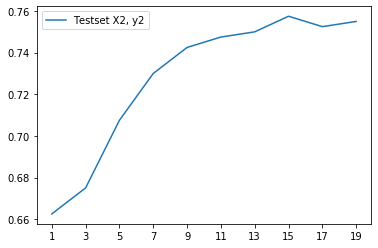

In [24]:
# Using much of the same setup as on the simpler training data so I can visualize the accuracies
x = range(1, 20, 2)
accuracies = []
for k in x:
    cls = PykNNClassifier(k=k)
    cls.fit(X_train, t_train)
    accuracies.append(cls.accuracy(X_val, t_val))
plt.plot(x, accuracies, label="Testset X2, y2")
plt.xticks(x)
plt.legend()

Combined = zip(x, accuracies)
print(tabulate(Combined, headers=["Neighbours", "Accuracy"], tablefmt='orgtbl'))

Here the optimum seems to be K=15. The graph and result also shows a very similar tendency compared to the simpler training set, this I suspect will cement this classifier as both versatile and accurate among the current crop of competitors. A final accuracy of 75.75% is achieved. 

### Logistic regression "one-vs-rest"
We saw in the lecture how a logistic regression classifier can be turned into a multi-class classifier using the one-vs-rest approach. We train one classifier for each class and assign the class which ascribes the highest probability.

Extend the logisitc regression classifier to a multi-class classifier. To do this, you must modify the target values from scalars to arrays. Train the resulting classifier on (X_train, t_train), test it on (X_val, t_val), and report the accuracy.

In [56]:
class NumpyLogRegMult():

    def accuracy(self,X_test, y_test, **kwargs):
        pred = self.predict(X_test, **kwargs)
        if len(pred.shape) > 1:
            pred = pred[:,0]
        return sum(pred==y_test)/len(pred)
    
    def fit(self, X_train, M_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
        (k, m) = X_train.shape
        X_train = self.add_bias(X_train)
        self.weights = []
        weight_classes = np.unique(M_train)
        print("currents weight classes:", weight_classes)
        for i in weight_classes:
            weights = np.zeros(m+1)
            for e in range(epochs):
                interim = eta / k *  X_train.T @ (self.logistic(X_train @ weights) - M_train[:,i])
                weights -= interim
            self.weights.append(weights)
        self.weights = np.array(self.weights).T
        
    def fitM(self, X_train, M_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
        (k, m) = X_train.shape
        X_train = self.add_bias(X_train)
        self.weights = []
        weight_classes = np.arange(M_train.shape[-1])
        for i in weight_classes:
            weights = np.zeros(m+1)
            for e in range(epochs):
                interim = eta / k *  X_train.T @ (self.logistic(X_train @ weights) - M_train[:,i])
                weights -= interim
            self.weights.append(weights)
        self.weights = np.array(self.weights).T
        
            
    def add_bias(self, X):
        # Put bias in position 0
        sh = X.shape
        if len(sh) == 1:
            #X is a vector
            return np.concatenate([np.array([1]), X])
        else:
            # X is a matrix
            m = sh[0]
            bias = np.ones((m,1)) # Makes a m*1 matrix of 1-s
            return np.concatenate([bias, X], axis  = 1) 

    def forward(self, X):
        forward_val = self.logistic(X @ self.weights)
        #print(forward_val)
        return forward_val
    
    def logistic(self, x):
        return 1/(1+np.exp(-x))
    
    def score(self, x):
        z = self.add_bias(x)
        score = self.forward(z)
        return score
    
    def predict(self, x, threshold=0.5):
        predictions = []
        for i in self.score(x):
            predictions.append(np.argmax(i))
        predictions = np.asarray(predictions).astype('int')
        
        return predictions

In [52]:
# One vs rest training ground. This is to properly train 'one vs rest'

m_t0_train = t_train == 0
m_t0_train = m_t0_train.astype('int')
m_t0_val = (t_val == 0).astype('int')
m_t0_test = (t_test == 0).astype('int')

m_t1_train = t_train == 1
m_t1_train = m_t1_train.astype('int')
m_t1_val = (t_val == 1).astype('int')
m_t1_test = (t_test == 1).astype('int')

m_t2_train = t_train == 2
m_t2_train = m_t2_train.astype('int')
m_t2_val = (t_val == 2).astype('int')
m_t2_test = (t_test == 2).astype('int')

M_train = np.zeros((800, 3))
M_train[:,0] = m_t0_train
M_train[:,1] = m_t1_train
M_train[:,2] = m_t2_train

In [57]:
test = NumpyLogRegMult()
test.fitM(X_train, M_train, eta=0.01, epochs=100000)
predictions = test.predict(X_val)
M_Log_acc = test.accuracy(X_val, t_val)
print("this is the 'one v all' accuracy:", M_Log_acc)

This is forward X_shape: (400, 3)
This is forward weights_shape: (3, 3)
This is  X at weights shape: (400, 3)
This is forward X_shape: (400, 3)
This is forward weights_shape: (3, 3)
This is  X at weights shape: (400, 3)
this is the 'one v all' accuracy: 0.77


Discuss the results in a couple of sentences, addressing questions like

- How do the two classfiers compare?
- How do the results on the three-class classification task compare to the results on the binary task?
- What do you think are the reasons for the differences?

The two classifiers are similar in accuray. The 'one v. all' classifiers needs more time to train than the KNN classifier, but it also achieved slightly better accuracy (74% vs 77%). I'm sure I could keep tweaking the Mult_regression classifier eta and epoch parameters to achieve more than 80%, but the point has been made.

## Adding non-linear features

We are returning to the binary classifier and the set (X, t2). As we see, some of the classifiers are not doing too well on the (X, t2) set. It is easy to see from the plot that this data set is not well suited for linear classifiers. There are several possible options for trying to learn on such a set. One is to construct new features from the original features to get better discriminants. This works e.g., for the XOR-problem. The current classifiers use two features: $x_1$ and $x_2$ (and a bias term $x_0$). Try to add three additional features of the form ${x_1}^2$, ${x_2}^2$, $x_1*x_2$ to the original features and see what the accuracies are now. Compare to the results for the original features in a 4x2 table.

Explain in a couple of sentences what effect the non-linear features have on the various classifiers. (By the way, some of the classifiers could probably achieve better results if we scaled the data, but we postpone scaling to part 2 of the assignment.)

In [31]:
M_dim = np.zeros((800, 5))

tsc_0_train = m_t0_train * m_t0_train
tsc_1_train = m_t1_train * m_t1_train
tsc_mult_train = m_t1_train * m_t0_train
M_dim[:,0] = m_t0_train
M_dim[:,1] = m_t1_train
M_dim[:,2] = tsc_0_train
M_dim[:,3] = tsc_1_train
M_dim[:,4] = tsc_mult_train
m_test = NumpyLogRegMult()
m_test.fitM(X_train, M_dim, eta=0.01, epochs=10000)
predictions = m_test.predict(X_val)
M_Log_acc = m_test.accuracy(X_val, t2_val)
print("this is the Mult accuracy:", M_Log_acc)

this is M_dim shape: (800, 5)
this is the Mult accuracy: 0.675


In [32]:
# Linear regression table

Classifiers = ["linear Regression", "logistic Regression", "KN Neighbours", "Perceptron", "Non-linear Multinomial Regression"]
Results = [Lin_acc, Log_acc, KNN_acc, Per_acc, M_Log_acc]
Combined = zip(Classifiers, Results)
print(tabulate(Combined, headers=["Classifiers", "Results"], tablefmt='orgtbl'))

| Classifiers                       |   Results |
|-----------------------------------+-----------|
| linear Regression                 |    0.6075 |
| logistic Regression               |    0.6075 |
| KN Neighbours                     |    0.7525 |
| Perceptron                        |    0.6475 |
| Non-linear Multinomial Regression |    0.675  |


The Multinomial network scores higher than its simpler counterparts, but is still not as great as the KNN network in this task. FOr this dataset/problem it may be more helpfull to use KNN in its entirety. For the Multinomial problem set the 'one v all' regression could actually beat KNN, but this is still worth more computational time and the realized gains were around 4%.

# Part II
## Multi-layer neural networks
We will implement the Multi-layer feed forward network (MLP, Marsland sec. 4.2.1). We will do so in two steps. In the first step, we will work concretely with the dataset (X, t). We will initialize the network and run a first round of training, i.e. one pass throught the algorithm at p. 78 in Marsland.

In the second step, we will turn this code into a more general classifier. We can train and test this on (X, t), but also on other datasets.

First of all, you should scale the X.

In [8]:
# after reading the gradient-descent jupyternotebook I will try to implement min/max scaling here
Xs_train = np.copy(X_train)


x_max = np.max(Xs_train)
x_min = np.min(Xs_train)
Xs_train = (Xs_train - x_min)/(x_max - x_min)
 
print(Xs_train.shape)

(800, 2)


## Step1: One round of training

### Initialization
We will only use one hidden layer. The number of nodes in the hidden layer will be a hyper-parameter provided by the user; let's call it *dim_hidden*. (*dim_hidden* is called *M* by Marsland.) Initially, we will set it to 6. This is a hyper-parameter where other values may give better results, and the hyper-parameter could be tuned.

Another hyper-parameter set by the user is the learning rate. We set the initial value to 0.01, but also this may need tuning.

In [283]:
eta = 0.01 #Learning rate
dim_hidden = 6

We assume that the input *X_train* (after scaling) is a matrix of dimension *P x dim_in*, where *P* is the number of training instances, and *dim_in* is the number of features in the training instances (*L* in Marsland). Hence we can read *dim_in* off from *X_train*. Similarly, we can read *dim_out* off from *t_train*. Beware that *t_train* must be given the form of *P x dim_out* at some point, cf. the "one-vs-all" exercise above.

In [284]:
dim_in =  0  # Calculate the correct value from the input data
dim_in = Xs_train.shape[-1]
print("This is dim_in:", dim_in)
dim_out = 0  # Calculate the correct value from the input data
dim_out = int(len(np.unique(t_train)))
print("This is dim_out:", dim_out)

This is dim_in: 2
This is dim_out: 3


We need two sets of weights: weights1 between the input and the hidden layer, and weights2, between the hidden layer and the output. Make the weight matrices and initialize them to small random numbers. Make sure that you take the bias terms into consideration and get the correct dimensions.

In [285]:
#Initialization
"""
I know there is a more clever way to scale the creation, but since the simgoid squishes the output anyway I'm just
going to use a numpy convenience function. I may revisit this if the results are very bad
"""
V_bias = np.ones((dim_in+1,1))
W_bias = np.ones((dim_hidden+1,1))
V = np.random.rand(dim_in+1, dim_hidden)

#V = np.concatenate((V_bias, V), axis=1)

W = np.random.rand(dim_hidden+1, dim_out)
#W = np.concatenate((W_bias, W), axis=1)

print("This is V_shape:", V.shape)
print("This is W_shape:", W.shape)
print(W.shape)

This is V_shape: (3, 6)
This is W_shape: (7, 3)
(7, 3)


### Forwards phase
We will run the first step in the training, and start with the forward phase. Calculate the activations after the hidden layer and after the output layer. We will follow Marsland and use the logistic (sigmoid) activation function in both layers. Inspect whether the results seem reasonable with respect to format and values.

In [287]:
def add_bias(X):
    # Put bias in position 0
    sh = X.shape
    if len(sh) == 1:
        #X is a vector
        return np.concatenate([np.array([1]), X])
    else:
        # X is a matrix
        m = sh[0]
        bias = np.ones((m,1)) # Makes a m*1 matrix of 1-s
        return np.concatenate([bias, X], axis  = 1) 

In [288]:
def logistic(x):
    return 1/(1+np.exp(-x))
print("This is the V shape:", V.shape)
print("This is the W shape:", W.shape)
print("The input and X training shape:", Xs_train.shape)
Xs_train  = add_bias(Xs_train)
print("The input and X training shape:", Xs_train.shape)
h_o = (Xs_train @ V)
print("The shape of h_o activation function:", h_o.shape)
a = logistic(h_o)
a = add_bias(a)
print("This is the output of activation func a:", a.shape)
h_k = a @ W
print("this is the h_k shape:", h_k.shape)
Y = logistic(h_k)
print("This is the output Y shape:", Y.shape)

This is the V shape: (3, 6)
This is the W shape: (7, 3)
The input and X training shape: (800, 2)
The input and X training shape: (800, 3)
The shape of h_o activation function: (800, 6)
This is the output of activation func a: (800, 7)
this is the h_k shape: (800, 3)
This is the output Y shape: (800, 3)


This seems reasonable and i get a matrix of activation functions, namely a.

### Backwards phase
Calculate the delta terms at the output. We assume, like Marsland, that we use sums of squared errors. (This amounts to the same as using the mean square error).

In [281]:
#Training label data generator ...

m_t0_train = t_train == 0
m_t0_train = m_t0_train.astype('int')
m_t0_val = (t_val == 0).astype('int')
m_t0_test = (t_test == 0).astype('int')

m_t1_train = t_train == 1
m_t1_train = m_t1_train.astype('int')
m_t1_val = (t_val == 1).astype('int')
m_t1_test = (t_test == 1).astype('int')

m_t2_train = t_train == 2
m_t2_train = m_t2_train.astype('int')
m_t2_val = (t_val == 2).astype('int')
m_t2_test = (t_test == 2).astype('int')

M_train = np.zeros((800, 3))
M_train[:,0] = m_t0_train
M_train[:,1] = m_t1_train
M_train[:,2] = m_t2_train

ValueError: could not broadcast input array from shape (800,1) into shape (800)

In [24]:
# using the Algorithm like Marsland p.78, with the code tweaks at 79
eta = 0.1
d_o = (M_train - Y)*Y*(1-Y)
print("This is the d_0 shape:", d_o.shape)
d_h = a*(1-a)*np.dot(d_o, np.transpose(W))
print("this is the d_h shape:", d_h.shape)

n_V = eta*(np.dot(np.transpose(Xs_train), d_h[:,:-1]))
print("this is n_V shape:", n_V.shape)
n_W = eta*(np.dot(np.transpose(a), d_o))
print("this is n_W shape:", n_W.shape)

print("this is the old V", V)
print(" ")
V += n_V
print("this is the new V", V)
print(" ")
print("this is the old W", W)
print(" ")
W += n_W
print("this is the new W", W)
print(" ")

This is the d_0 shape: (800, 3)
this is the d_h shape: (800, 7)
this is n_V shape: (3, 6)
this is n_W shape: (7, 3)
this is the old V [[0.69219362 6.76190606 6.81376488 7.0581359  7.62528128 5.48635391]
 [0.99560278 3.175145   3.57105478 3.80108579 3.0558384  3.36168099]
 [0.18649516 4.24118756 3.52293827 3.71670728 3.86515168 3.2510182 ]]
 
this is the new V [[ 0.69219362 21.68451142 22.13961971 22.51405819 23.84765294 20.55589764]
 [ 0.99560278  9.83338715 10.47006855 10.72852556 10.38571231 10.21520749]
 [ 0.18649516 12.20463976 11.60078758 11.97234085 12.57352857 11.3214585 ]]
 
this is the old W [[ -5.22700476  -5.55502084 -12.8381535 ]
 [ -3.86859749  -4.48537536  -9.59893648]
 [ -3.75230112  -4.04135226  -9.23175986]
 [ -4.13259653  -3.74885361  -9.79491875]
 [ -2.73993136  -3.33203736  -8.09999081]
 [ -3.43143203  -4.07697165  -8.86807657]
 [ -3.402088    -3.06753634  -8.89437585]]
 
this is the new W [[ -8.01082813  -8.45587425 -19.33521951]
 [ -6.06839508  -6.73775295 -14.623

##  Step 2: A Multi-layer neural network classifier

You want to train and test a classifier on (X, t). You could have put some parts of the code in the last step into a loop and run it through some iterations. But instead of copying code for every network we want to train, we will build a general Multi-layer neural network classfier as a class. This class will have some of the same structure as the classifiers we made for linear and logistic regression. The task consists mainly in copying in parts from what you did in step 1 into the template below. Remember to add the *self*- prefix where needed, and be careful in your use of variable names.

In [272]:
class MNNClassifier():
    """A multi-layer neural network with one hidden layer"""
    
    def __init__(self,eta = 0.001, dim_hidden = 6):
        """Initialize the hyperparameters"""
        self.eta = eta
        self.dim_hidden = dim_hidden
        
    def fit(self, X_train, t_train, epochs = 100, diff=0.00001, momentum=0.2):
        """Initialize the weights. Train *epochs* many epochs."""
        # Scaling X_train correctly first
        self.momentum = momentum
        Xs_train = np.copy(X_train)
        x_max = np.max(Xs_train)
        x_min = np.min(Xs_train)
        Xs_train = (Xs_train - x_min)/(x_max - x_min) # scaled 

        Xs_train = np.concatenate((Xs_train,-np.ones((np.shape(Xs_train)[0],1))),axis=1)

        

        self.dim_in = X_train.shape[-1]

        self.dim_out = int(t_train.shape[-1])

        self.V = (np.random.rand(self.dim_in+1,self.dim_hidden)-0.5)*2/np.sqrt(self.dim_in)
        self.W = (np.random.rand(self.dim_hidden+1,self.dim_out)-0.5)*2/np.sqrt(self.dim_hidden)

        n_V = np.zeros((np.shape(self.V)))
        n_W = np.zeros((np.shape(self.W)))
        
        for e in range(epochs):

            self.forward(Xs_train)

            d_o = (self.Y - t_train)*self.Y*(1.0-self.Y)
            d_h = self.a*(1.0-self.a)*(np.dot(d_o,np.transpose(self.W)))
            n_V = self.eta*(np.dot(np.transpose(Xs_train),d_h[:,:-1])) + self.momentum*n_V
            n_W = self.eta*(np.dot(np.transpose(self.a),d_o)) + self.momentum*n_W
            self.V -= n_V
            self.W -= n_W



    def logistic(self, x):
        return 1/(1+np.exp(-x))       
        
        
    def add_bias(self, X):
        # Put bias in position 0
        sh = X.shape
        if len(sh) == 1:
            #X is a vector
            return np.concatenate([np.array([1]), X])
        else:
            # X is a matrix
            m = sh[0]
            bias = np.ones((m,1)) # Makes a m*1 matrix of 1-s
            return np.concatenate([bias, X], axis  = 1) 
            
    def forward(self, X):
            h_o = np.dot(X, self.V)
            self.a = self.logistic(h_o)
            self.a = np.concatenate((self.a,-np.ones((np.shape(self.a)[0],1))),axis=1)
            h_k = np.dot(self.a, self.W)
            self.Y = self.logistic(h_k)
            #return Y
        #Fill in the code
        
    def confmat(self,inputs,targets, acc=0):
        # taken from marslands webpage, and then I've added some extra like recall and resolution.
        """Confusion matrix"""
        # Add the inputs that match the bias node
        inputs = np.concatenate((inputs,-np.ones((np.shape(inputs)[0],1))),axis=1)
        #outputs = self.forward(inputs)
        self.forward(inputs)
        
        nclasses = np.shape(targets)[1]

        if nclasses==1:
            nclasses = 2
            self.Y = np.where(self.Y>0.5,1,0)
        else:
            # 1-of-N encoding
            self.Y = np.argmax(self.Y,1)
            targets = np.argmax(targets,1)

        cm = np.zeros((nclasses,nclasses))
        for i in range(nclasses):
            for j in range(nclasses):
                cm[i,j] = np.sum(np.where(self.Y==i,1,0)*np.where(targets==j,1,0))
        precision = cm[0,0]/(cm[0,0] + cm[1,0])
        recall = cm[0,0]/(cm[0,0] + cm[0,1])

        if acc==0:
            print ("Confusion matrix is:")
            print (cm)
            print ("Percentage Correct: ",np.trace(cm)/np.sum(cm)*100)
            print("precision:", precision)
            print("recall:", recall)
        else:
            return (np.trace(cm)/np.sum(cm)*100)

In [260]:
# Class performance on t_test data
t_val = t_val.reshape((len(t_val), 1))
t_train = t_train.reshape((len(t_train), 1))
lr_cl =  MNNClassifier(eta = 0.01, dim_hidden=6)
lr_cl.fit(X_train, t_train, epochs=10000)
#print("predictions: ", lr_cl.predict(anddata[:,0:2]))
print(lr_cl.confmat(X_train, t_train))

Confusion matrix is:
[[128.  13.]
 [ 66. 403.]]
Percentage Correct:  87.04918032786885
None


In [278]:
# Class performance on t2_test data
t2_val = t2_val.reshape((len(t2_val), 1))
t2_train = t2_train.reshape((len(t2_train), 1))
lr_cl =  MNNClassifier(eta = 0.01, dim_hidden=6)
lr_cl.fit(X_train, t2_train, epochs=10000)
#print("predictions: ", lr_cl.predict(anddata[:,0:2]))
print(lr_cl.confmat(X_val, t2_val))

Confusion matrix is:
[[ 74.   7.]
 [ 40. 182.]]
Percentage Correct:  84.48844884488449
precision: 0.6491228070175439
recall: 0.9135802469135802
None


In [261]:
# how does scikit learn do for around the same parameters?
from sklearn.neural_network import MLPClassifier
t_val = t[indices[800:1200]]
t_train = t[indices[:800]]
clf = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(6, 1), random_state=1)
clf.fit(X_train, t_train)

pred = clf.predict(X_val)
if len(pred.shape) > 1:
    pred = pred[:,0]
accuracy = sum(pred==t_val)/len(pred) 
print("this is scikit accuracy:", accuracy)
 

this is scikit accuracy: 0.7525


When scikit has about the samme accuracy as mine I guess I'm pretty happy. Although, Scikit is setup for only 6 neurons an unknown number of epochs, and a very small alpha, and also My algorithm only reaches 75% infrequently. Nevertheless, I guess I'm happy with the results.

Train the network on (X_train, t_train) (after scaling), and test on (X_val, t_val). Adjust hyperparameters or number of epochs if you are not content with the result.

## Make a neural network classifier for (X,t)
Let us see whether a multilayer neural network can learn a non-linear classifier.
Train it on (X_train, t_train) and test it on (X_val, t_val).
Tune the hyper-parameters for the best result.

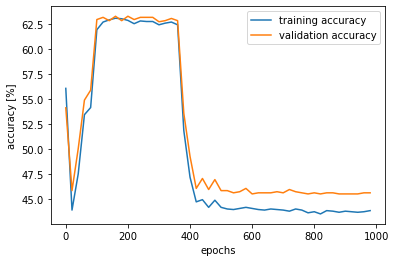

In [279]:
t_val = t_val.reshape((len(t_val), 1))
t_train = t_train.reshape((len(t_train), 1))
T_acc = []
V_acc = []
sets = np.arange(0, 1000, 20)
for e in sets:
    lr_cl =  MNNClassifier(eta = 0.01, dim_hidden=6)
    lr_cl.fit(X_train, M_train, epochs=e)
    T_acc.append(lr_cl.confmat(X_train, t_train, acc=1))
    V_acc.append(lr_cl.confmat(X_val, t_val, acc=1))

plt.plot(sets, np.asarray(T_acc), label="training accuracy")
plt.plot(sets, np.asarray(V_acc), label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy [%]")
plt.legend()
plt.show()

NOTE: Somewhat unsure about the sudden descent indo madness, but I'm guessing there's some values that are kept when the for loop starts again because running the class.fit once on 10K epochs gives an 87% accuracy rate, as you've seen in the previous sections

## For master's students: Early stopping
There is a danger of overfitting if we run too many epochs of training. One way to control that is to use early stopping. We can use (X_val, t_val) as valuation set when training on (X_train, t_train).

Let *e=50* or *e=10* (You may try both or choose some other number) After *e* number of epochs, calculate the loss for both the training set (X_train, t_train) and the validation set (X_val, t_val), and plot them as in figure 4.11 in Marsland. 

Modify the code so that the training stops if the loss on the validation set is not reduced by more than *t* after *e* many epochs, where *t* is a threshold you provide as a parameter. 

# Part III: Final testing
Take the best classifiers that you found for the training sets (X, t) and (X, t2) and test them on (X_test, t_test) and (X_test, t2_test), respectively. Compute accuracy, the confusion matrix, precision and recall. Answer in 2-3 sentences: How do the accuracies compare to the results on the validation sets?

In [277]:
# (X, t2) performance, trained with X_train, t2_train, and validated with X_test and t2_test
t2_val = t2_val.reshape((len(t2_val), 1))
t2_train = t2_train.reshape((len(t2_train), 1))
t2_test = t2_test.reshape((len(t2_test), 1))
lr_cl =  MNNClassifier(eta = 0.01, dim_hidden=6)
lr_cl.fit(X_train, t2_train, epochs=10000)
print(lr_cl.confmat(X_test, t2_test))


Confusion matrix is:
[[ 65.   5.]
 [140. 190.]]
Percentage Correct:  63.74999999999999
precision: 0.3170731707317073
recall: 0.9285714285714286
None


In [276]:
# (X, t) performance, trained with X_train, t_train, and validated with X_test and t_test
t_train = t_train.reshape((len(t_train), 1))
t_test = t_test.reshape((len(t_test), 1))
lr_cl =  MNNClassifier(eta = 0.01, dim_hidden=6)
lr_cl.fit(X_train, t_train, epochs=10000)
print(lr_cl.confmat(X_test, t_test))

Confusion matrix is:
[[ 67.   6.]
 [ 25. 189.]]
Percentage Correct:  89.19860627177701
precision: 0.7282608695652174
recall: 0.9178082191780822
None


The best classifier ends up being the Multi-layer perceptron class. I think this is natural given the extra computing power that should arise from the added hidden layer. When it comes to the accuracy of the validation set versus the test set, we can see from the reports above that the classifier actually scores higher (89%) versus the validation set (87%), but much worse when it comes to the binary data. Here it scores 84% on the validation set, but just 64% on the test data.